# Predicting Disaster Tweets <br/>
This project aims to train an LSTM model to predict disaster tweets. The solution will be implemented by following a series of steps that were provided by the entity requesting the projects. </br></br>
* The list goes as follows: 
    * Load the dataset
    * Check the head and info
    * Check for missing data 
    * How much data is in each class? 
    * Get the top 15 locations in the data
    * Get the top 15 keywords in the data
    * What are the most common words
    * What are the most common stopwords
    * Use NLP to prepare the dataset [tokenization, pad sequence, etc.]
    * Prepare train, test sets
    * Train the LSTM structure
    * Evaluate the model and make predictions
    * Save the model
    * Post to gh
---
## 1- Load the dataset

In [3]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

I decided to take a slightly different approach by merging both the train an test sets so that preprocessing could be applied to both sets at once. </br>
First, I took a reference to the initial size of each set

In [13]:
train_shape = train.shape
test_shape = test.shape
print(f'Train: {train_shape}\nTest: {test_shape}\nTotal rows: {train_shape[0] + test_shape[0]}')

Train: (7613, 5)
Test: (3263, 4)
Total rows: 10876


In [15]:
df = pd.merge(train, test, how = "outer")
print(f'Actual total merged size {df.shape}')


Actual total merged size (10876, 5)


An extra column was added for the target in the train set. This is how I intend to divide the sets in the future.

---

## 2- Check head and info of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10876 entries, 0 to 10875
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        10876 non-null  int64  
 1   keyword   10789 non-null  object 
 2   location  7238 non-null   object 
 3   text      10876 non-null  object 
 4   target    7613 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 509.8+ KB


In [7]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0


---
## 3- Check for missing data, </br> 4- How Much data is in each class

In [8]:
for col in df:
    if col != 'target':
        number_of_nan = df[col].isnull().sum()
        print(f"Column: {col}\n\tNans: {number_of_nan}\n\tPercentage: {round(number_of_nan/len(df[col]) * 100, 2)}%\n\tSize of available data: {len(df[col]) - number_of_nan}")



Column: id
	Nans: 0
	Percentage: 0.0%
	Size of available data: 10876
Column: keyword
	Nans: 87
	Percentage: 0.8%
	Size of available data: 10789
Column: location
	Nans: 3638
	Percentage: 33.45%
	Size of available data: 7238
Column: text
	Nans: 0
	Percentage: 0.0%
	Size of available data: 10876


---

## 5- Get the top 15 locations

In [18]:
df['location'].value_counts()[:15]


USA                141
New York           109
United States       65
London              58
Canada              42
Nigeria             40
India               35
Worldwide           35
Los Angeles, CA     34
UK                  33
Kenya               32
Washington, DC      31
Mumbai              28
United Kingdom      26
California          25
Name: location, dtype: int64

---

## 6- Get the top 15 keywords in the data

In [19]:
df['keyword'].value_counts()[:15]

blight                  50
rioting                 50
fire                    50
burning                 50
engulfed                50
quarantined             50
electrocuted            50
hailstorm               50
flood                   50
windstorm               50
structural%20failure    50
bioterror               50
destruction             50
eyewitness              50
rubble                  50
Name: keyword, dtype: int64

---

## 7- What are the most common words? </br> 8- What are the most common stopwords? 


I deiced it was easier to tokenize the list of tweets before preprocessing so as to make it easier to extract common words and stopwords

In [34]:
import nltk
import matplotlib
import matplotlib.pyplot as plt

In [42]:

text = df['text'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(text)
word_dist = nltk.FreqDist(words)
most_common_words = pd.DataFrame(pd.DataFrame(word_dist.most_common(500), columns=['Word', 'Freq']))
most_common_words.head(15)


,Word,Freq
0,:,9636
1,http,6157
2,#,4946
3,the,4554
4,?,4458
5,.,4175
6,@,4039
7,a,3071
8,to,2826
9,in,2796


Stopwords and punctuation characters were left intentionally (will be removed later)

<AxesSubplot:>

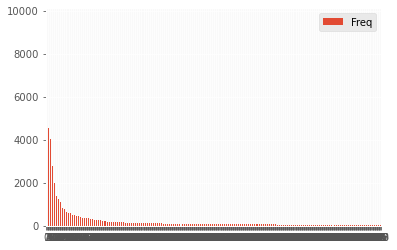

In [43]:
matplotlib.style.use('ggplot')
most_common_words.plot.bar(rot = 0)

### Most Common Stopwords

In [45]:
stopwords = nltk.corpus.stopwords.words('english')
stop_dist = nltk.FreqDist(w for w in words if w in stopwords) 
most_common_stopwords = pd.DataFrame(pd.DataFrame(stop_dist.most_common(500), columns=['Stopword', 'Freq']))
most_common_stopwords.head(15)

,Stopword,Freq
0,the,4554
1,a,3071
2,to,2826
3,in,2796
4,of,2601
5,i,2446
6,and,2013
7,is,1417
8,you,1256
9,for,1240


<AxesSubplot:>

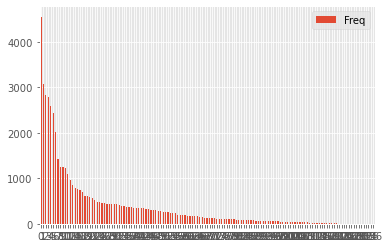

In [46]:
most_common_stopwords.plot.bar(rot = 0)

---
## 9- Use NLP to prepare the dataset